# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [4]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [5]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 623


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [6]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}?q={city}&appid={weather_api_key}&units=metric"

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except Exception as e:
        print(f"City {city} not found. Skipping... Error: {e}")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | lebu
Processing Record 2 of Set 1 | petropavlovsk-kamchatsky
Processing Record 3 of Set 1 | susuman
Processing Record 4 of Set 1 | hawaiian paradise park
Processing Record 5 of Set 1 | codrington
Processing Record 6 of Set 1 | kibondo
Processing Record 7 of Set 1 | puerto natales
Processing Record 8 of Set 1 | ta`u
Processing Record 9 of Set 1 | iskateley
Processing Record 10 of Set 1 | broome
Processing Record 11 of Set 1 | blackmans bay
Processing Record 12 of Set 1 | port mathurin
Processing Record 13 of Set 1 | adamstown
Processing Record 14 of Set 1 | giyani
Processing Record 15 of Set 1 | waitangi
Processing Record 16 of Set 1 | ushuaia
Processing Record 17 of Set 1 | margaret river
Processing Record 18 of Set 1 | bethel
Processing Record 19 of Set 1 | margate
Processing Record 20 of Set 1 | laguna
Processing Record 21 of Set 1 | rodolfo sanchez taboada
Processing Record 22 of Set 1 | debre

In [7]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          588
Lat           588
Lng           588
Max Temp      588
Humidity      588
Cloudiness    588
Wind Speed    588
Country       588
Date          588
dtype: int64

In [8]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,lebu,-37.6167,-73.6500,13.07,88,100,5.56,CL,1729658863
1,petropavlovsk-kamchatsky,53.0452,158.6483,10.33,54,75,4.00,RU,1729658864
2,susuman,62.7833,148.1667,-17.26,98,82,0.83,RU,1729658865
3,hawaiian paradise park,19.5933,-154.9731,23.82,93,98,1.34,US,1729658840
4,codrington,-38.2667,141.9667,15.95,61,9,14.00,AU,1729658867


In [9]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [10]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,lebu,-37.6167,-73.6500,13.07,88,100,5.56,CL,1729658863
1,petropavlovsk-kamchatsky,53.0452,158.6483,10.33,54,75,4.00,RU,1729658864
2,susuman,62.7833,148.1667,-17.26,98,82,0.83,RU,1729658865
3,hawaiian paradise park,19.5933,-154.9731,23.82,93,98,1.34,US,1729658840
4,codrington,-38.2667,141.9667,15.95,61,9,14.00,AU,1729658867


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

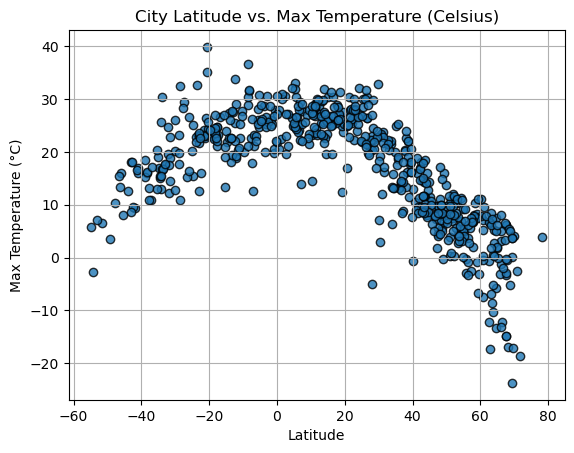

In [11]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'], edgecolor='black', linewidths=1, marker='o', alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (Celsius)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (°C)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

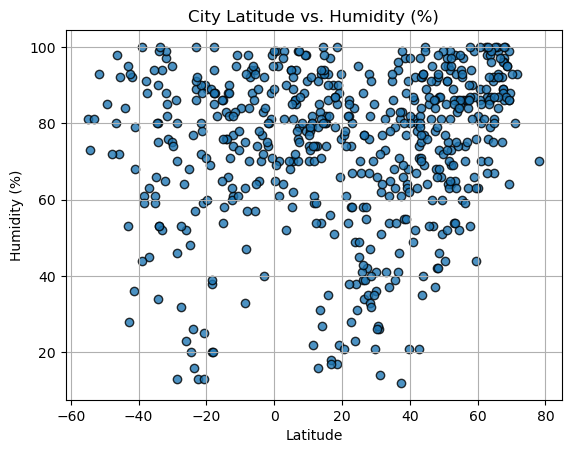

In [12]:
# Build the scatter plot for latitude vs. humidity
plt.scatter(city_data_df['Lat'], city_data_df['Humidity'], edgecolor='black', linewidths=1, marker='o', alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (%)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

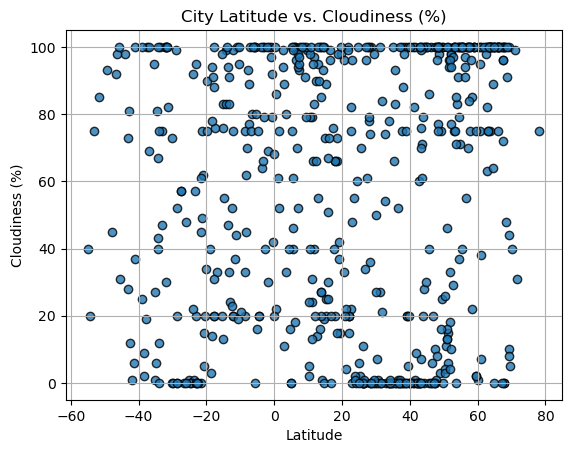

In [13]:
# Build the scatter plot for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'], edgecolor='black', linewidths=1, marker='o', alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (%)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

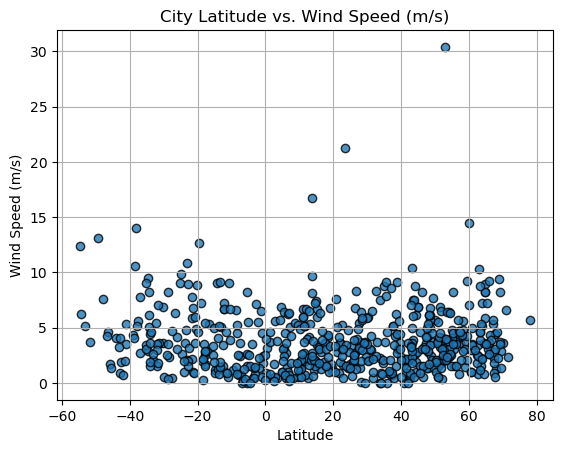

In [14]:
# Build the scatter plot for latitude vs. wind speed
plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'], edgecolor='black', linewidths=1, marker='o', alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (m/s)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [15]:
# Define a function to create Linear Regression plots

# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, x_label, y_label, title, hemisphere):
    # Perform linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    
    # Get the regression line equation
    regress_values = x_values * slope + intercept
    line_eq = f"y = {round(slope, 2)}x + {round(intercept, 2)}"
    
    # Create the scatter plot
    plt.scatter(x_values, y_values, edgecolor='black', linewidths=1, marker='o', alpha=0.8)
    
    # Plot the regression line
    plt.plot(x_values, regress_values, "r-")
    
    # Annotate the line equation on the plot
    plt.annotate(line_eq, (min(x_values) + 5, min(y_values) + 5), fontsize=15, color="red")
    
    # Add titles and labels
    plt.title(f"{title} ({hemisphere})")
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    
    # Show grid
    plt.grid(True)
    
    # Show the plot
    plt.show()

    # Print the R-squared value
    print(f"R-squared: {rvalue**2}")

In [16]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,petropavlovsk-kamchatsky,53.0452,158.6483,10.33,54,75,4.00,RU,1729658864
2,susuman,62.7833,148.1667,-17.26,98,82,0.83,RU,1729658865
3,hawaiian paradise park,19.5933,-154.9731,23.82,93,98,1.34,US,1729658840
8,iskateley,67.6803,53.1512,6.20,97,100,4.40,RU,1729658872
9,broome,42.2506,-75.8330,17.04,78,0,2.06,US,1729658873


In [17]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,lebu,-37.6167,-73.6500,13.07,88,100,5.56,CL,1729658863
4,codrington,-38.2667,141.9667,15.95,61,9,14.00,AU,1729658867
5,kibondo,-3.5864,30.7203,20.02,77,64,0.46,TZ,1729658868
6,puerto natales,-51.7236,-72.4875,6.48,93,85,3.67,CL,1729658870
7,ta`u,-14.2336,-169.5144,27.29,83,99,9.07,AS,1729658871


###  Temperature vs. Latitude Linear Regression Plot

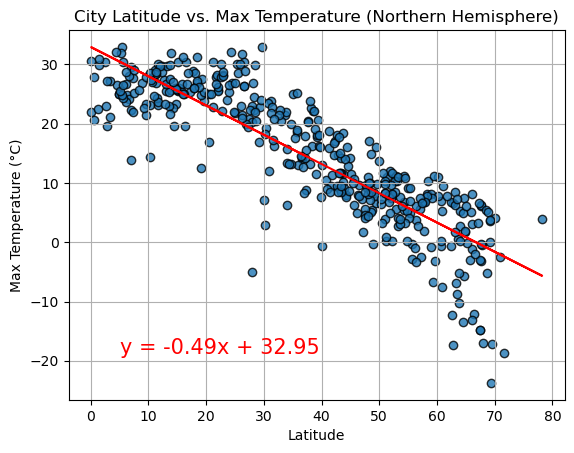

R-squared: 0.7537908348047551


In [18]:
# Linear regression on Northern Hemisphere
plot_linear_regression(
    northern_hemi_df['Lat'], 
    northern_hemi_df['Max Temp'], 
    'Latitude', 
    'Max Temperature (°C)', 
    'City Latitude vs. Max Temperature', 
    'Northern Hemisphere'
)

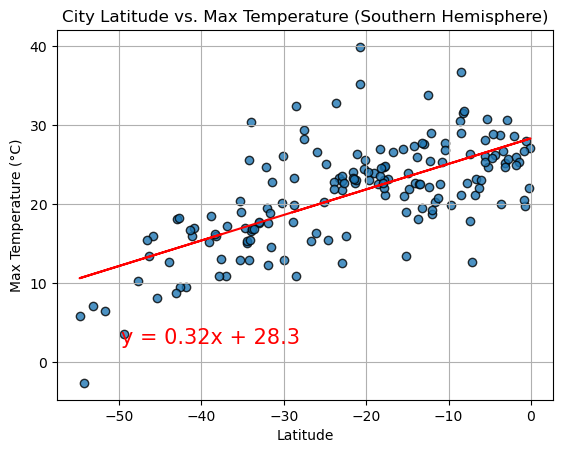

R-squared: 0.4574931588731123


In [19]:
# Linear regression on Southern Hemisphere
plot_linear_regression(
    southern_hemi_df['Lat'], 
    southern_hemi_df['Max Temp'], 
    'Latitude', 
    'Max Temperature (°C)', 
    'City Latitude vs. Max Temperature', 
    'Southern Hemisphere'
)

**Discussion about the linear relationship:** This plot shows a positive correlation between latitude and maximum temperature in the Southern Hemisphere, meaning that cities closer to the equator tend to experience higher maximum temperatures. The regression line provides a mathematical model to predict temperature based on latitude.

### Humidity vs. Latitude Linear Regression Plot

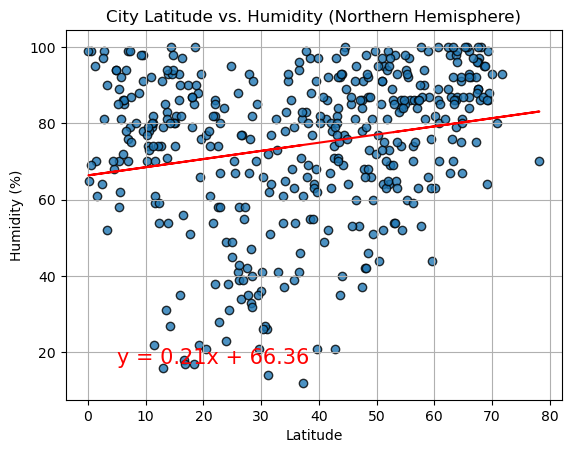

R-squared: 0.04454191453103882


In [20]:
# Northern Hemisphere
plot_linear_regression(
    northern_hemi_df['Lat'], 
    northern_hemi_df['Humidity'], 
    'Latitude', 
    'Humidity (%)', 
    'City Latitude vs. Humidity', 
    'Northern Hemisphere'
)

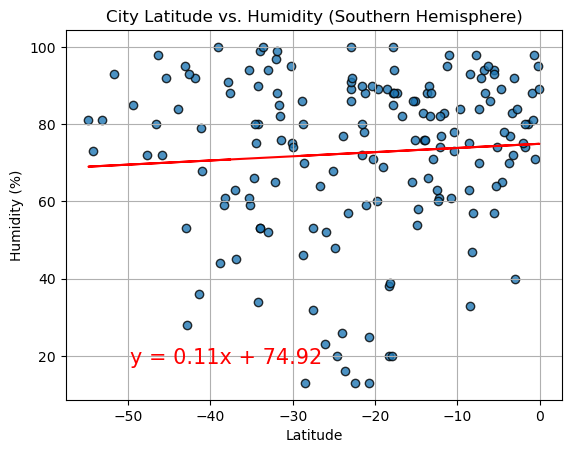

R-squared: 0.004930992290843992


In [24]:
# Southern Hemisphere
plot_linear_regression(
    southern_hemi_df['Lat'], 
    southern_hemi_df['Humidity'], 
    'Latitude', 
    'Humidity (%)', 
    'City Latitude vs. Humidity', 
    'Southern Hemisphere'
)

**Discussion about the linear relationship:** Cities in the Southern Hemisphere have a stronger linear relationship when compared to cities in the Nothern Hemisphere. 

### Cloudiness vs. Latitude Linear Regression Plot

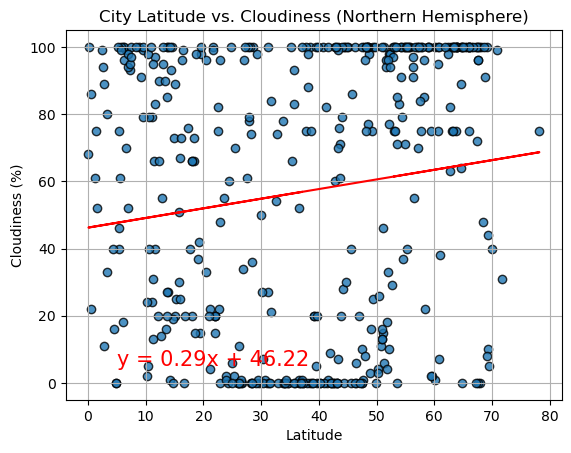

R-squared: 0.01950879752790904


In [25]:
# Northern Hemisphere
plot_linear_regression(
    northern_hemi_df['Lat'], 
    northern_hemi_df['Cloudiness'], 
    'Latitude', 
    'Cloudiness (%)', 
    'City Latitude vs. Cloudiness', 
    'Northern Hemisphere'
)

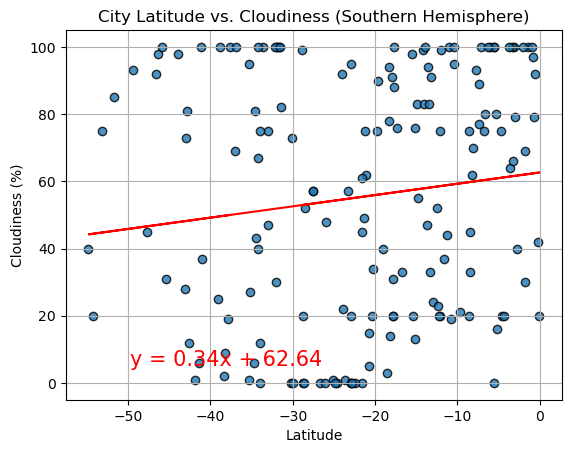

R-squared: 0.01643383859425942


In [26]:
# Southern Hemisphere
plot_linear_regression(
    southern_hemi_df['Lat'], 
    southern_hemi_df['Cloudiness'], 
    'Latitude', 
    'Cloudiness (%)', 
    'City Latitude vs. Cloudiness', 
    'Southern Hemisphere'
)

**Discussion about the linear relationship:** Both plots show a very low linear relationship, with a high margin for error. Saying that, cities in the Norhter Hamisphere have a greater linear relationship with cloudiness, when compared to cities in the Souther Hemisphere.  

### Wind Speed vs. Latitude Linear Regression Plot

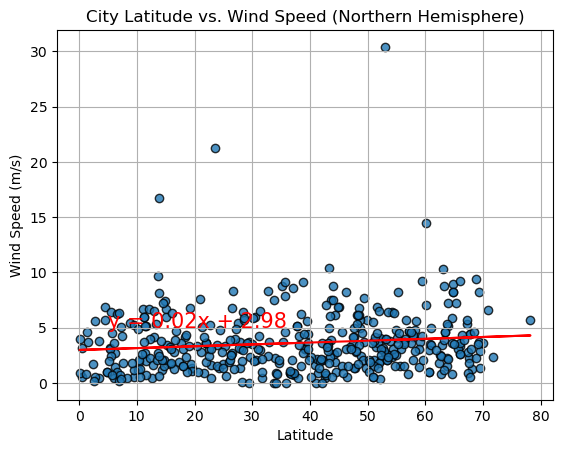

R-squared: 0.013656481781862722


In [27]:
# Northern Hemisphere
plot_linear_regression(
    northern_hemi_df['Lat'], 
    northern_hemi_df['Wind Speed'], 
    'Latitude', 
    'Wind Speed (m/s)', 
    'City Latitude vs. Wind Speed', 
    'Northern Hemisphere'
)

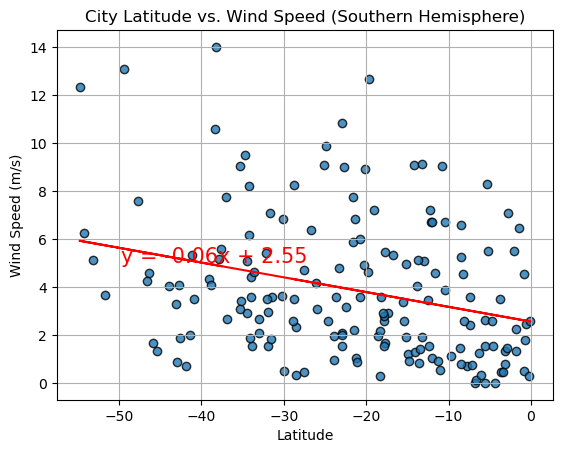

R-squared: 0.08314434613889338


In [29]:
# Southern Hemisphere
plot_linear_regression(
    southern_hemi_df['Lat'], 
    southern_hemi_df['Wind Speed'], 
    'Latitude', 
    'Wind Speed (m/s)', 
    'City Latitude vs. Wind Speed', 
    'Southern Hemisphere'
)

**Discussion about the linear relationship:** The relationship between wind speed and cities in the Northern Hemisphere when compared to cities in the Southern Hemisphere. 